<a href="https://colab.research.google.com/github/mdpw/msc-ai-cw/blob/main/full_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
# 1. Load the dataset
file_path = "https://raw.githubusercontent.com/mdpw/msc-ai-cw/main/dataset/cinnamon_quality_dataset.csv"  # Use raw content URL
df = pd.read_csv(file_path)

In [3]:
# 2. Basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (1260, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample_ID               1260 non-null   object 
 1   Moisture (%)            1260 non-null   float64
 2   Ash (%)                 1260 non-null   float64
 3   Volatile_Oil (%)        1260 non-null   float64
 4   Acid_Insoluble_Ash (%)  1260 non-null   float64
 5   Chromium (mg/kg)        1260 non-null   float64
 6   Coumarin (mg/kg)        1260 non-null   float64
 7   Quality_Label           1260 non-null   object 
dtypes: float64(6), object(2)
memory usage: 78.9+ KB
None

First 5 rows:
  Sample_ID  Moisture (%)   Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
0      H018     10.789005  5.572559          1.259205                0.209963   
1      L009     13.923084  7.043669          0.690446                0.739094   
2      H

In [4]:
# 3. Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Moisture (%)      Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
count   1260.000000  1260.000000       1260.000000             1260.000000   
mean      11.887224     6.522170          1.051225                0.451606   
std        1.169604     0.628862          0.272911                0.157070   
min       10.021690     5.520874          0.606326                0.197697   
25%       11.017503     5.978487          0.771195                0.348661   
50%       11.638028     6.486592          1.082036                0.430228   
75%       12.733444     7.161447          1.260000                0.552217   
max       13.973884     7.496544          1.493286                0.794266   

       Chromium (mg/kg)  Coumarin (mg/kg)  
count       1260.000000       1260.000000  
mean           0.002207          0.008836  
std            0.000744          0.004919  
min            0.000993          0.002077  
25%            0.001601          0.004400  
50%     

In [5]:
# 4. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Sample_ID                 0
Moisture (%)              0
Ash (%)                   0
Volatile_Oil (%)          0
Acid_Insoluble_Ash (%)    0
Chromium (mg/kg)          0
Coumarin (mg/kg)          0
Quality_Label             0
dtype: int64



Target Distribution:
Quality_Label
High      420
Low       420
Medium    420
Name: count, dtype: int64


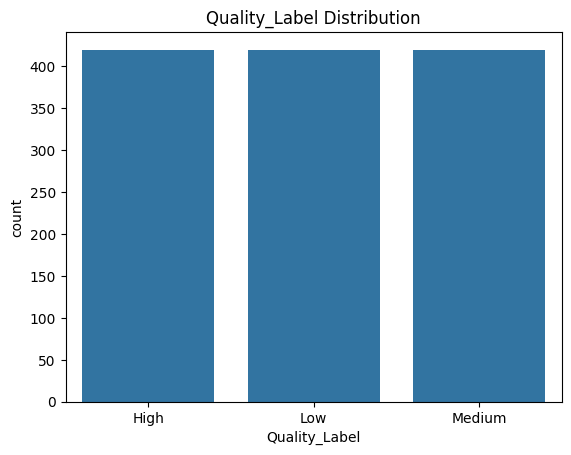

In [7]:
# 5. Class distribution (Quality_Label)
print("\nTarget Distribution:")
print(df['Quality_Label'].value_counts())
sns.countplot(x='Quality_Label', data=df)
plt.title('Quality_Label Distribution')
plt.show()

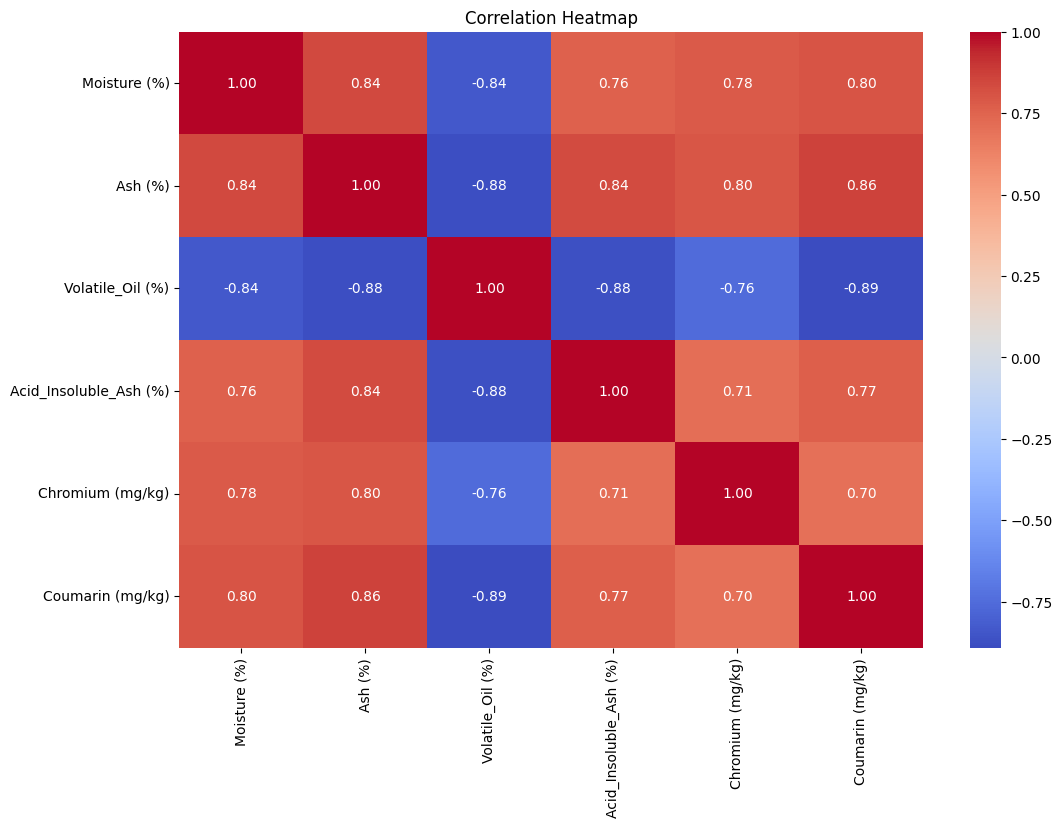

In [8]:
# 6. Correlation Matrix (Numerical Features Only)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

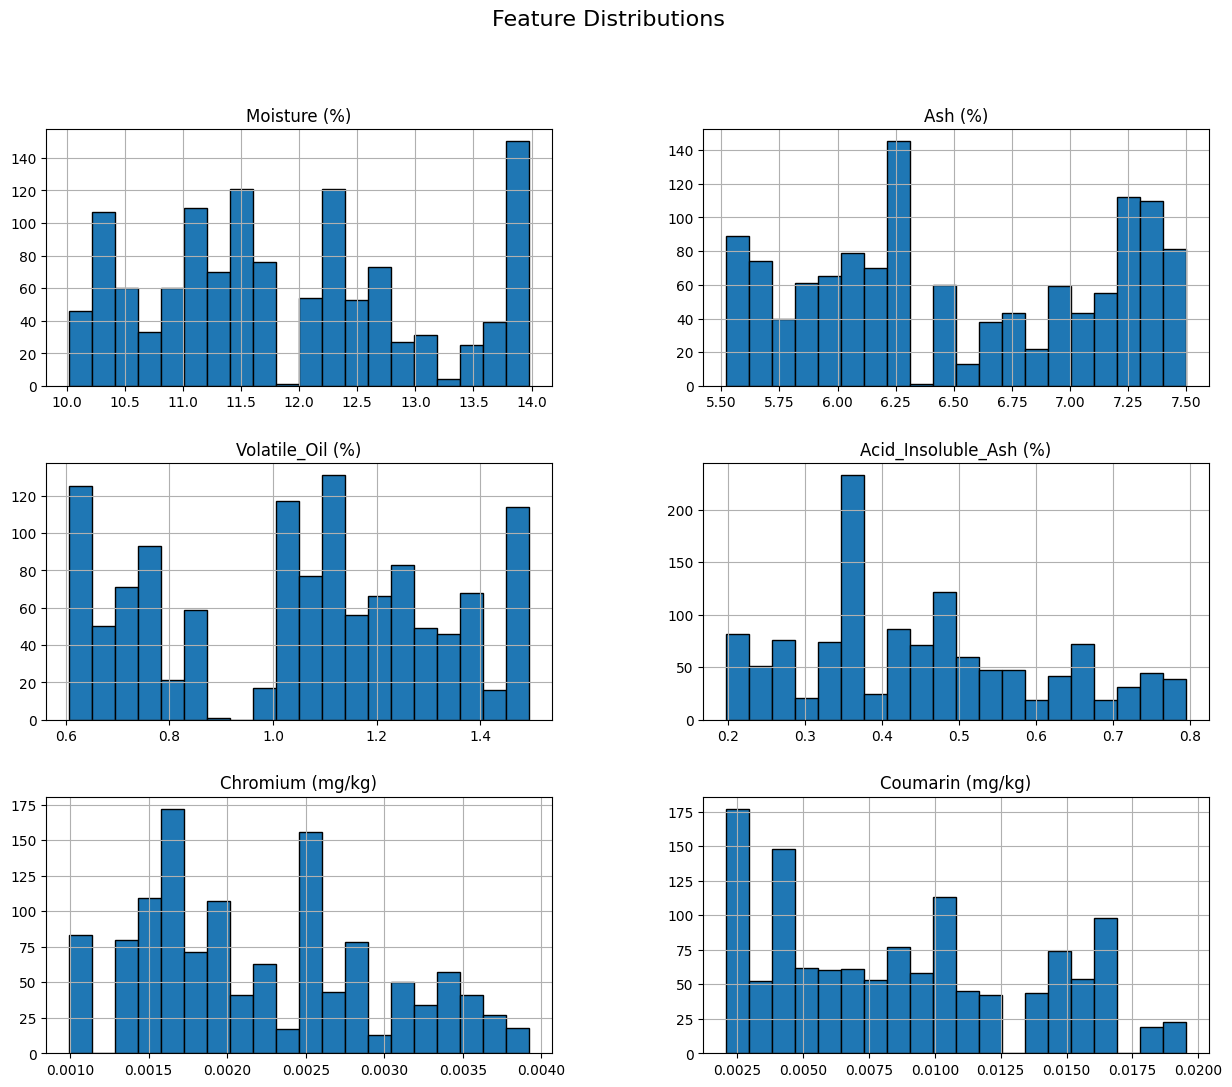

In [9]:
# 7. Distribution of each numerical feature
numeric_cols = numeric_df.columns
df[numeric_cols].hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [33]:
# 8. Pairplot (optional - can be slow for large datasets)
#sns.pairplot(df[numeric_cols[:5].to_list() + ['IsDefective']], hue='IsDefective')
#plt.show()


In [34]:
# 9. Outlier detection (Boxplots)
#for col in numeric_cols:
#    plt.figure(figsize=(6, 4))
#    sns.boxplot(data=df, x='IsDefective', y=col)
#    plt.title(f'Boxplot of {col} by IsDefective')
#    plt.show()

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from torch.utils.data import Dataset, DataLoader
import torch

In [36]:
# Define column groups
categorical_cols = [
    "FabricType", "PrintAlignment",
    "PackingQuality", "Shift", "GarmentType", "DefectCountInBatch"
]
binary_cols = ["ColorConsistency", "LabelPositionAccuracy", "OilStains", "IroningQuality"]
numeric_cols = [
    "StitchCount", "ThreadTension", "SeamStrength", "MeasurementAccuracy",
    "ButtonAttachmentStrength", "BrokenStitches", "LooseThreads",
    "Humidity", "Temperature", "ProductionTimePerPiece(min)",
]
target_col = "IsDefective"

In [43]:
# Split features and target
X = df[categorical_cols + binary_cols + numeric_cols]
y = df[target_col].values

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ("num", StandardScaler(), numeric_cols)
], remainder='passthrough')  # Pass binary columns as-is

# Fit and transform
X_processed = preprocessor.fit_transform(X)
print(X_processed)

# Split dataset into train+val and test first
X_temp, X_test, y_temp, y_test = train_test_split(
    X_processed, y, test_size=0.2, stratify=y, random_state=42
)

# Split train+val into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)
# (0.25 of 0.8 = 0.2 → 60% train, 20% val, 20% test)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

# PyTorch Dataset class
class GarmentDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets and loaders
train_dataset = GarmentDataset(X_train_tensor, y_train_tensor)
val_dataset = GarmentDataset(X_val_tensor, y_val_tensor)
test_dataset = GarmentDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 1. 1.]]


In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class ImprovedNN(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # input → 128
        self.bn1 = nn.BatchNorm1d(128)
        self.drop1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(128, 64)  # 128 → 64
        self.bn2 = nn.BatchNorm1d(64)
        self.drop2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, 32)   # 64 → 32
        self.bn3 = nn.BatchNorm1d(32)
        self.drop3 = nn.Dropout(0.3)

        self.out = nn.Linear(32, 1)    # 32 → 1

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.drop1(x)

        x = F.relu(self.bn2(self.fc2(x)))
        x = self.drop2(x)

        x = F.relu(self.bn3(self.fc3(x)))
        x = self.drop3(x)

        return self.out(x)

# Instantiate model
input_dim = X_train_tensor.shape[1]
model = ImprovedNN(input_dim).to(device)
print(input_dim)

37


In [41]:
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 20

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}")

    # Evaluate on test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = torch.sigmoid(outputs) > 0.5
            correct += (preds == labels.bool()).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/20 - Loss: 0.7061
Test Accuracy: 0.4918
Epoch 2/20 - Loss: 0.6987
Test Accuracy: 0.4910
Epoch 3/20 - Loss: 0.6951
Test Accuracy: 0.4858
Epoch 4/20 - Loss: 0.6947
Test Accuracy: 0.4954
Epoch 5/20 - Loss: 0.6924
Test Accuracy: 0.4898
Epoch 6/20 - Loss: 0.6925
Test Accuracy: 0.5058
Epoch 7/20 - Loss: 0.6889
Test Accuracy: 0.5030
Epoch 8/20 - Loss: 0.6898
Test Accuracy: 0.5054
Epoch 9/20 - Loss: 0.6902
Test Accuracy: 0.5134
Epoch 10/20 - Loss: 0.6884
Test Accuracy: 0.5166
Epoch 11/20 - Loss: 0.6874
Test Accuracy: 0.5062
Epoch 12/20 - Loss: 0.6853
Test Accuracy: 0.5181
Epoch 13/20 - Loss: 0.6849
Test Accuracy: 0.5078
Epoch 14/20 - Loss: 0.6826
Test Accuracy: 0.5066
Epoch 15/20 - Loss: 0.6832
Test Accuracy: 0.5193
Epoch 16/20 - Loss: 0.6793
Test Accuracy: 0.5237
Epoch 17/20 - Loss: 0.6799
Test Accuracy: 0.5166
Epoch 18/20 - Loss: 0.6792
Test Accuracy: 0.5138
Epoch 19/20 - Loss: 0.6790
Test Accuracy: 0.5042
Epoch 20/20 - Loss: 0.6762
Test Accuracy: 0.5162
